<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#plot-latents-and-trial-vars" data-toc-modified-id="plot-latents-and-trial-vars-1">plot latents and trial vars</a></span></li><li><span><a href="#plot-latents-and-trial-vars-(smoothed)" data-toc-modified-id="plot-latents-and-trial-vars-(smoothed)-2">plot latents and trial vars (smoothed)</a></span></li><li><span><a href="#signal-looks-it-changes-wildly-at-around-this-time----it-has-some-relationship" data-toc-modified-id="signal-looks-it-changes-wildly-at-around-this-time----it-has-some-relationship-3">signal looks it changes wildly at around this time -- it has some relationship</a></span></li><li><span><a href="#choice-also-looks-to-have-some-kind-of-relationship----it-does" data-toc-modified-id="choice-also-looks-to-have-some-kind-of-relationship----it-does-4">choice also looks to have some kind of relationship -- it does</a></span></li><li><span><a href="#&quot;correctness&quot;:-choice-==-cued----it-has-some-relationship" data-toc-modified-id="&quot;correctness&quot;:-choice-==-cued----it-has-some-relationship-5">"correctness": choice == cued -- it has some relationship</a></span></li><li><span><a href="#I-wonder-if-the-relationships-are-just-due-to-projection,-I-will-project-cued,-since-it-should-have-no-relationship" data-toc-modified-id="I-wonder-if-the-relationships-are-just-due-to-projection,-I-will-project-cued,-since-it-should-have-no-relationship-6">I wonder if the relationships are just due to projection, I will project cued, since it should have no relationship</a></span></li><li><span><a href="#the-average-cued-has-an-abrupt-change-at-this-point,-which-may-explain-the-corresponding-changes-in-signal-and-choice" data-toc-modified-id="the-average-cued-has-an-abrupt-change-at-this-point,-which-may-explain-the-corresponding-changes-in-signal-and-choice-7">the average cued has an abrupt change at this point, which may explain the corresponding changes in signal and choice</a></span></li></ul></div>

In [2]:
%matplotlib widget

import torch
import pickle
import model
import os.path
import numpy as np
from matplotlib.pyplot import *
from importlib import reload
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import utils
import lvutils as lv
import mattplotlib as m
import matth as math

def redo():
    reload(utils)
    reload(lv)
    reload(m)
    reload(math)

Invoking __init__.py for NDNT.utils


# Exploring latent 2 to see how they might be explained by the trial variables.

In [3]:
data = utils.load_data('ki_0126_V2_py.mat')
# load the saved out latents
model = utils.load_model('model1.pickle')
R = utils.construct_R_matrix(data)
Z = utils.construct_Z_matrix(R, model, num_latents=3)
Z.shape # trials X time X latents

../../data/hn/ ki_0126_V2_py.mat
Loaded ki_0126_V2_py.mat
190541 frames, 26 units, 870 trials with 192 frames each


(870, 200, 3)

## plot latents and trial vars

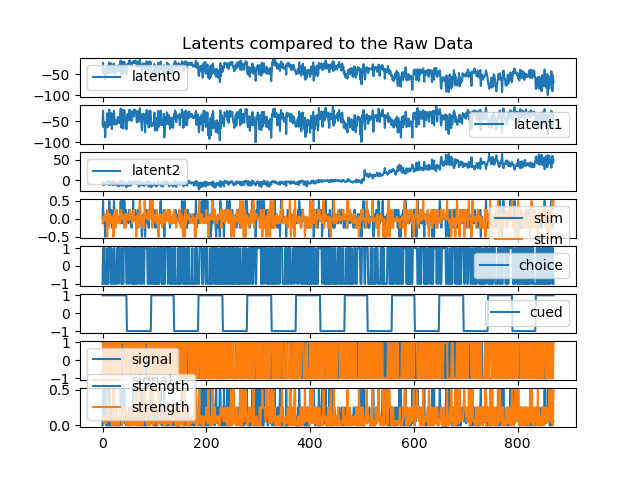

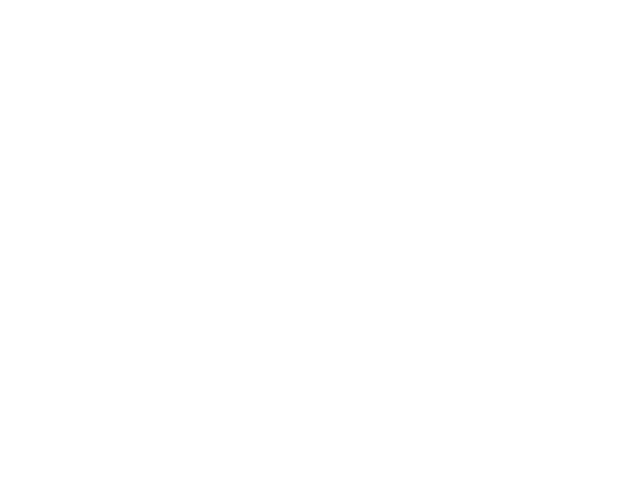

In [4]:
latent0 = np.mean(Z, axis=1).T[0]
latent1 = np.mean(Z, axis=1).T[1]
latent2 = np.mean(Z, axis=1).T[2]
m.fig()
m.plots((latent0, "latent0"),
        (latent1, "latent1"),
        (latent2, "latent2"),
        (data.TRstim, "stim"),
        (data.TRchoice, "choice"),
        (data.TRcued, "cued"),
        (data.TRsignal, "signal"),
        (data.TRstrength, "strength"),
       title="Latents compared to the Raw Data")

## plot latents and trial vars (smoothed)

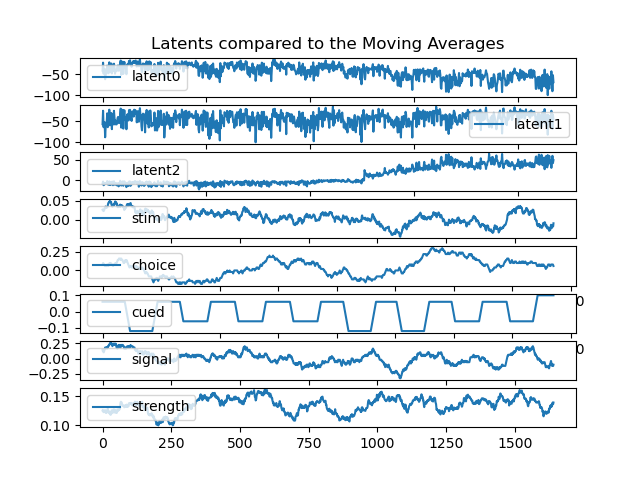

In [5]:
latent0 = np.mean(Z, axis=1).T[0]
latent1 = np.mean(Z, axis=1).T[1]
latent2 = np.mean(Z, axis=1).T[2]
m.fig()
m.plots((latent0, "latent0"),
        (latent1, "latent1"),
        (latent2, "latent2"),
        (math.movavg(data.TRstim, 100), "stim"),
        (math.movavg(data.TRchoice, 100), "choice"),
        (math.movavg(data.TRcued, 100), "cued"),
        (math.movavg(data.TRsignal, 100), "signal"),
        (math.movavg(data.TRstrength, 100), "strength"),
       title="Latents compared to the Moving Averages")

## signal looks it changes wildly at around this time -- it has some relationship

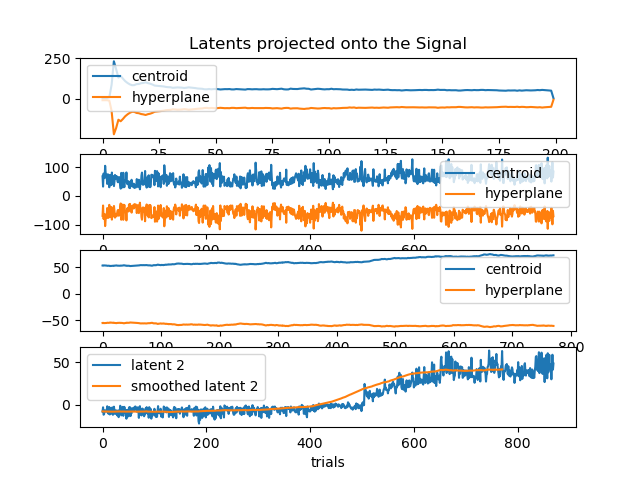

In [6]:
# this tells us which side to look at for the experimental variables
sides = data.TRcued.copy() # copy the array so we don't corrupt the raw data
sides[sides == 1] = 0 # make all +1 sides index into column 0
sides[sides == -1] = 1 # make all the -1 sides index into column 1
trsignal = np.array([signal[side] for signal, side in zip(data.TRsignal, sides)])

# project the latents onto the signal and see what comes out
m.fig()
num_plots = 4
plt.subplot(num_plots, 1, 1)
plt.plot((lv.centroid_vector(Z, trsignal) @ np.mean(Z, axis=0).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, trsignal) @ np.mean(Z, axis=0).T).T, label="hyperplane")
plt.xlabel("time")  # TODO: this doesn't show up
plt.title("Latents projected onto the Signal")
plt.legend()
plt.subplot(num_plots, 1, 2)
plt.plot((lv.centroid_vector(Z, trsignal) @ np.mean(Z, axis=1).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, trsignal) @ np.mean(Z, axis=1).T).T, label="hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 3)
plt.plot(math.movavg((lv.centroid_vector(Z, trsignal) @ np.mean(Z, axis=1).T).T, 100), label="centroid")
plt.plot(math.movavg((lv.hyperplane_vector(Z, trsignal) @ np.mean(Z, axis=1).T).T, 100), label="hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 4)
plt.plot(latent2, label="latent 2")
plt.plot(math.movavg(latent2, 100), label="smoothed latent 2")
plt.xlabel("trials")
plt.legend()
plt.show()

## choice also looks to have some kind of relationship -- it does

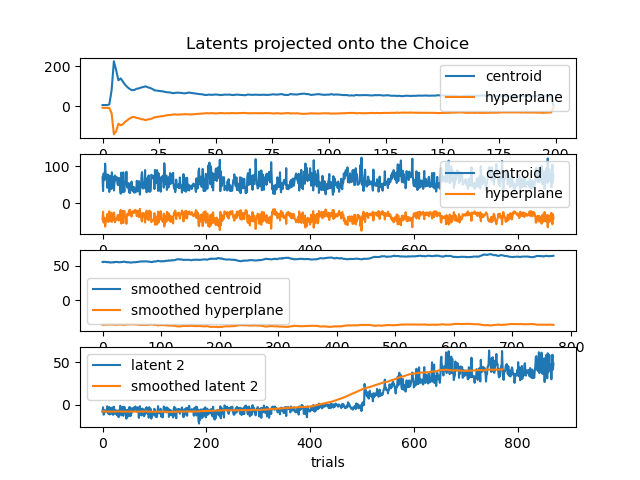

In [7]:
# project the latents onto the signal and see what comes out
m.fig()
num_plots = 4
plt.subplot(num_plots, 1, 1)
plt.plot((lv.centroid_vector(Z, data.TRchoice) @ np.mean(Z, axis=0).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, data.TRchoice) @ np.mean(Z, axis=0).T).T, label="hyperplane")
plt.xlabel("time")  # TODO: this doesn't show up
plt.title("Latents projected onto the Choice")
plt.legend()
plt.subplot(num_plots, 1, 2)
plt.plot((lv.centroid_vector(Z, data.TRchoice) @ np.mean(Z, axis=1).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, data.TRchoice) @ np.mean(Z, axis=1).T).T, label="hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 3)
plt.plot(math.movavg((lv.centroid_vector(Z, data.TRchoice) @ np.mean(Z, axis=1).T).T, 100), label="smoothed centroid")
plt.plot(math.movavg((lv.hyperplane_vector(Z, data.TRchoice) @ np.mean(Z, axis=1).T).T, 100), label="smoothed hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 4)
plt.plot(latent2, label="latent 2")
plt.plot(math.movavg(latent2, 100), label="smoothed latent 2")
plt.xlabel("trials")
plt.legend()
plt.show()

## "correctness": choice == cued -- it has some relationship

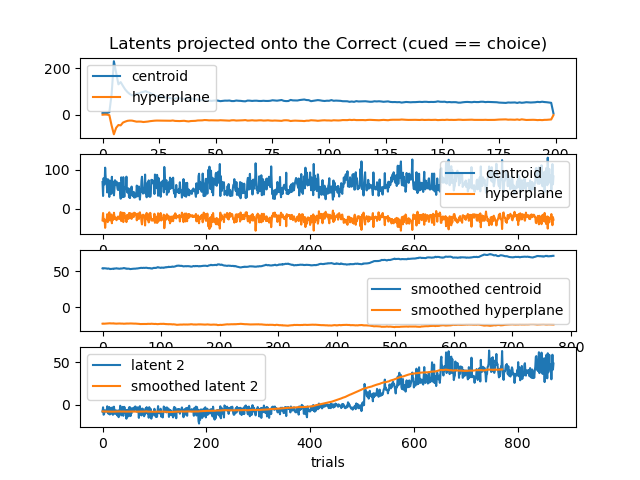

In [8]:
trcorrect = (data.TRchoice == data.TRcued).astype(int)

# project the latents onto the signal and see what comes out
m.fig()
num_plots = 4
plt.subplot(num_plots, 1, 1)
plt.plot((lv.centroid_vector(Z, trcorrect) @ np.mean(Z, axis=0).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, trcorrect) @ np.mean(Z, axis=0).T).T, label="hyperplane")
plt.xlabel("time") # TODO: this doesn't show up
plt.title("Latents projected onto the Correct (cued == choice)")
plt.legend()
plt.subplot(num_plots, 1, 2)
plt.plot((lv.centroid_vector(Z, trcorrect) @ np.mean(Z, axis=1).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, trcorrect) @ np.mean(Z, axis=1).T).T, label="hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 3)
plt.plot(math.movavg((lv.centroid_vector(Z, trcorrect) @ np.mean(Z, axis=1).T).T, 100), label="smoothed centroid")
plt.plot(math.movavg((lv.hyperplane_vector(Z, trcorrect) @ np.mean(Z, axis=1).T).T, 100), label="smoothed hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 4)
plt.plot(latent2, label="latent 2")
plt.plot(math.movavg(latent2, 100), label="smoothed latent 2")
plt.xlabel("trials")
plt.legend()
plt.show()

## I wonder if the relationships are just due to projection, I will project cued, since it should have no relationship

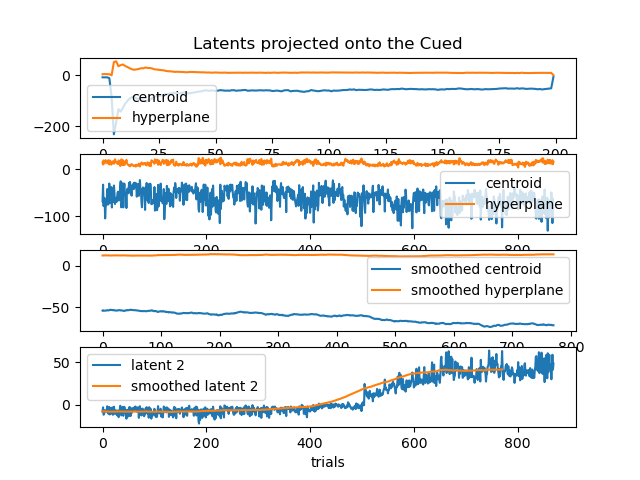

In [9]:

# project the latents onto the signal and see what comes out
m.fig()
num_plots = 4
plt.subplot(num_plots, 1, 1)
plt.plot((lv.centroid_vector(Z, data.TRcued) @ np.mean(Z, axis=0).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, data.TRcued) @ np.mean(Z, axis=0).T).T, label="hyperplane")
plt.xlabel("time") # TODO: this doesn't show up
plt.title("Latents projected onto the Cued")
plt.legend()
plt.subplot(num_plots, 1, 2)
plt.plot((lv.centroid_vector(Z, data.TRcued) @ np.mean(Z, axis=1).T).T, label="centroid")
plt.plot((lv.hyperplane_vector(Z, data.TRcued) @ np.mean(Z, axis=1).T).T, label="hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 3)
plt.plot(math.movavg((lv.centroid_vector(Z, data.TRcued) @ np.mean(Z, axis=1).T).T, 100), label="smoothed centroid")
plt.plot(math.movavg((lv.hyperplane_vector(Z, data.TRcued) @ np.mean(Z, axis=1).T).T, 100), label="smoothed hyperplane")
plt.legend()
plt.subplot(num_plots, 1, 4)
plt.plot(latent2, label="latent 2")
plt.plot(math.movavg(latent2, 100), label="smoothed latent 2")
plt.xlabel("trials")
plt.legend()
plt.show()

## the average cued has an abrupt change at this point, which may explain the corresponding changes in signal and choice

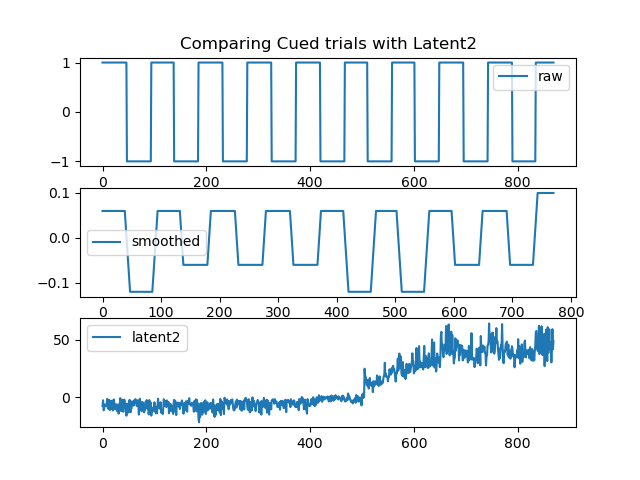

In [11]:
m.fig()
m.plots(
    (data.TRcued, "raw"),
    (math.movavg(data.TRcued, 100), "smoothed"),
    (latent2, "latent2"),
    title="Comparing Cued trials with Latent2"
)